In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt

In [2]:

base_counts = collections.Counter()
with open(r'D:\dstore\nlp\wcounts', 'rt', encoding='utf8') as f:
    for x in f.readlines():
        x = x.strip('\n').split()
        base_counts[x[1]] += int(x[0])


def count_engrams(en: int) -> tuple[np.ndarray, list[str]]:
    encounts = collections.Counter()
    if -(en - 1) == 0:
        finish_point = None
    else:
        finish_point = -(en - 1)
    for x in base_counts:
        nletters = len(x)
        if nletters < en:
            continue
        elif nletters == en:
            encounts[f'_{x}_'] = base_counts[x]
        else:
            for i, _ in enumerate(x[:finish_point]):
                if i == 0:
                    encounts[f'_{x[i:i+en]}'] += base_counts[x]
                elif i == nletters - en:
                    encounts[f'{x[i:i+en]}_'] += base_counts[x]
                else:
                    encounts[x[i:i+en]] += base_counts[x]
    return encounts


In [80]:
ngrams = []
for z in range(1, 11):
    ngrams.append(count_engrams(z))
ngrams[0] = {k: v for k, v in ngrams[0].items() if '_' in k}
ngrams = {k:v for y in ngrams for k, v in y.items()}
ngrams = collections.Counter(ngrams)
full_words = [(k, v) for k, v in ngrams.items() if k[0] == '_' and k[-1] == '_' and len(k) > 3]

for w in full_words:
    targets = []
    wlen = len(w[0])
    for j in range(wlen - 3):
        targets.append(w[0][2+j:])
        targets.append(w[0][:-(j+2)])
    for k in range(wlen - 4, 1, -1): #Width of word
        for l in range(2, wlen - k - 1): #Number of k-width words in target
            targets.append(w[0][l:l+k])
    for y in targets:
        ngrams[y] -= w[1]

ngrams = collections.Counter({k: v for k, v in ngrams.items() if v > 9})
ngarr = np.array([x[1] for x in ngrams.most_common()])

(array([408735., 333196., 279714., 234960., 203561., 178037., 155569.,
        139579., 125759., 115077., 102999.,  94201.,  86809.,  80279.,
         73494.,  68389.,  63834.,  59625.,  55953.,  53258.,  49266.,
         46476.,  44478.,  42652.,  39902.,  37802.,  35859.,  33375.,
         32933.,  31292.,  29811.,  28686.,  27165.,  26422.,  25135.,
         24183.,  23425.,  22137.,  21452.,  21285.,  19770.,  19444.,
         18870.,  17677.,  17318.,  17239.,  16378.,  16212.,  15668.,
         15002.,  14427.,  13917.,  13933.,  13212.,  12923.,  12792.,
         12104.,  11951.,  12141.,  11517.,  10930.,  11082.,  20955.]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]),
 <BarContainer object of 63 artists>)

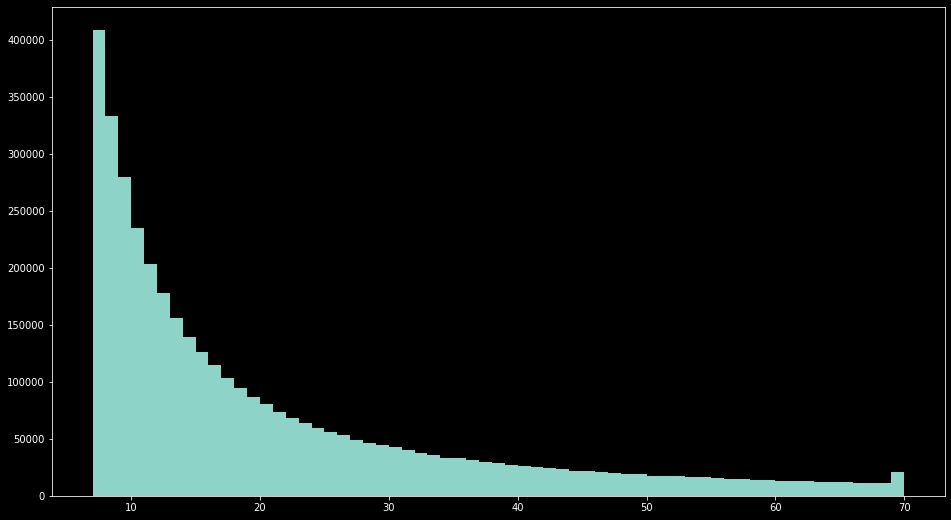

In [81]:
fig = plt.figure(figsize=(16, 9))
plt.hist(ngarr, range(7, 71))
#Power Law

In [20]:
print('mean', np.mean(ngarr))
print('std', np.std(ngarr))
print('se', np.std(ngarr)/np.sqrt(len(ngarr)))

mean 782.3403755524849
std 84144.36834555096
se 28.4584803165284


In [89]:
means = []
devs =[]

for x in range(512):
    sample = np.random.choice(ngarr, 32768)
    means.append(np.mean(sample))
    devs.append(np.std(sample))

means = np.array(sorted(means))
devs = np.array(sorted(devs))
iqr = means[int(len(means) * 0.75)] - means[int(len(means) * 0.25)]

temp = [x / 32768**0.5 for x in devs]
np.mean(devs)


50659.88763663736

In [ ]:
bincount = int((means.max() - means.min()) / (2 * iqr * 512 ** -0.3333))
fig = plt.figure(figsize=(16, 9))
plt.hist(means, range(bincount))